In [25]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [1]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df

#load json object
    
json_data = ''

with open('yelp_dataset/review.json', 'r', encoding='utf-8') as in_file:
    for i, line in enumerate(in_file):
        if i == 0 and line: 
            json_data += '[' + line
        elif line:
            json_data += ',' + line
        else:
            pass
    json_data += ']\n'

data = json.loads(json_data)
review_df = json_normalize(data)


In [2]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df

#load json object
    
json_data = ''

with open('yelp_dataset/business.json', 'r', encoding='utf-8') as in_file:
    for i, line in enumerate(in_file):
        if i == 0 and line: 
            json_data += '[' + line
        elif line:
            json_data += ',' + line
        else:
            pass
    json_data += ']\n'

data = json.loads(json_data)
df = json_normalize(data)


In [3]:
temp = df.categories.apply(lambda categories: str(categories))
restaurant_df = df[temp.apply(lambda categories: 'Restaurants' in categories)][['categories',"business_id"]]
restaurant_df.head()


,categories,business_id
1,"Specialty Food, Restaurants, Dim Sum, Imported...",QXAEGFB4oINsVuTFxEYKFQ
2,"Sushi Bars, Restaurants, Japanese",gnKjwL_1w79qoiV3IC_xQQ
11,"Restaurants, Breakfast & Brunch, Mexican, Taco...",1Dfx3zM-rW4n-31KeC8sJg
13,"Italian, Restaurants, Pizza, Chicken Wings",fweCYi8FmbJXHCqLnwuk8w
17,"Restaurants, Italian",PZ-LZzSlhSe9utkQYU8pFg


In [4]:
res_review = pd.merge(review_df,restaurant_df,on = 'business_id', how = 'left', sort = False)
res_review=res_review.fillna(0)


In [5]:
res_review.shape


(6685900, 10)

In [6]:
restaurant_r=res_review[res_review.categories!=0]


In [7]:
restaurant_r.shape


(4201684, 10)

In [63]:
restaurant_r[:20]


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,categories
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg,"Bars, Pubs, Nightlife, Tapas Bars, Restaurants"
5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4.0,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw,"Restaurants, Italian, Pizza"
6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3.0,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ,"Food, Chinese, Restaurants, Desserts"
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1.0,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA,"Sports Bars, Bars, Restaurants, American (New)..."
10,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4.0,"Like walking back in time, every Saturday morn...",0,FIk4lQQu1eTe2EpzQ4xhBA,"Performing Arts, Amusement Parks, Museums, Arc..."
11,mRUVMJkUGxrByzMQ2MuOpA,0,2017-12-15 23:27:08,1,-I5umRTkhw15RqpKMl_o1Q,1.0,"Walked in around 4 on a Friday afternoon, we s...",0,-mA3-1mN4JIEkqOtdbNXCQ,"Restaurants, Breakfast & Brunch, Burgers, Amer..."
12,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4.0,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw,"Italian, Salad, Restaurants, Gluten-Free"
14,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1.0,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,"Asian Fusion, Restaurants, Vietnamese"
15,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5.0,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw,"Sandwiches, Restaurants, Italian, Pizza"
16,NyLYY8q1-H3hfsTwuwLPCg,0,2015-01-03 22:47:34,0,1wVA2-vQIuW_ClmXkDxqMQ,4.0,Great lunch today. Staff was very helpful in a...,0,86J5DwcFk4f4In1Vxe2TvA,"Fast Food, Vegetarian, Restaurants, Vegan, Indian"


# Approach 2 using DBSCAN

In [9]:
import re
import string
char_splitter = re.compile("[.,;!:()-]?")
def generate_candidate_phrases(text, stopwords):
    coarse_candidates = char_splitter.split(text.lower())
    candidate_phrases = []
    word=""
    n=0

    for coarse_phrase in coarse_candidates:
        words=re.split("\\s+", coarse_phrase.strip())
        previous_stop = False
        start=True
        for w in words:

            w=w.translate(str.maketrans('', '', string.punctuation))
            if w in stopwords and not previous_stop:

                # phrase boundary encountered, so put a hard indicator
                if n>1:          
                    candidate_phrases.append(word)
                previous_stop = True
                word=""
                n=0
            elif w in stopwords and previous_stop:

                word=""
                n=0
            elif w not in stopwords and len(w) > 3:
                # keep adding words to list until a phrase boundary is detected
                if start==True:
                    n=1
                    start=False
                elif previous_stop==False:
                    w="_"+w
                    n=n+1   
                else:
                    n=1
                word+=w
                previous_stop = False



    if n>1:
        candidate_phrases.append(word)

    return candidate_phrases

In [10]:
import spacy
sp = spacy.load('en') 
stop=list(sp.Defaults.stop_words) 
stop.append("said")
stop.append("came")
stop.append("tell")
stop.append("told")
stop.append("when")
stop.append("maybe")
stop.append("sure")
stop.append("like")
stop.append("it's")
stop.append("i'm")
stop.append("ask")
stop.append("asked")
stop.append("you're")
stop.append("youre")
stop.remove("not")

In [340]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=3 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    

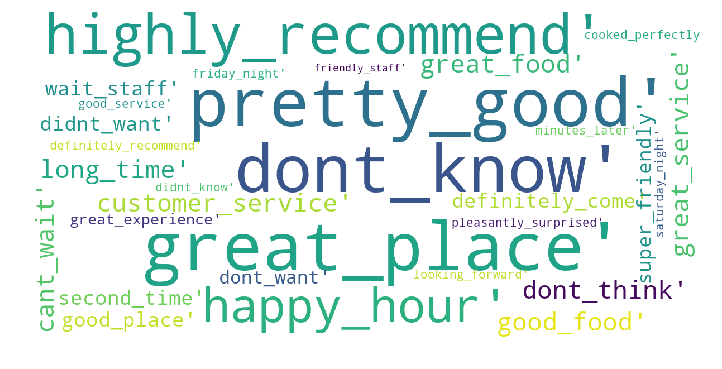

In [341]:
show_wordcloud(cnt)

In [13]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(
        p,
        size=200,
        window=10,
        min_count=10,
        alpha=0.02,
        workers=10)
model.train(p, total_examples=len(p), epochs=20)


/Applications/anaconda3/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


(424461806, 684704060)

In [14]:
model.save("word2vec0507.model")


In [16]:
model.wv.most_similar('super_friendly')


[('incredibly_friendly', 0.43793678283691406),
 ('incredibly_nice', 0.3967793881893158),
 ('super_sweet', 0.3504594564437866),
 ('totally_love', 0.344701886177063),
 ('extremely_friendly', 0.3353217542171478),
 ('super_attentive', 0.3309912085533142),
 ('super_kind', 0.3247328996658325),
 ('super_helpful', 0.3221518397331238),
 ('super_welcoming', 0.3165372610092163),
 ('extra_friendly', 0.2960626482963562)]

In [17]:
model.wv.most_similar('highly_recommend')

[('absolutely_recommend', 0.49285370111465454),
 ('highly_recommend_coming', 0.4794062674045563),
 ('perfecthighly_recommend', 0.43249964714050293),
 ('highly_recommend_trying', 0.4240497350692749),
 ('highlyhighly_recommend', 0.4170829653739929),
 ('definitely_recommended', 0.41526851058006287),
 ('certainly_recommend', 0.4100279211997986),
 ('betterhighly_recommend', 0.4098738431930542),
 ('greathighly_recommend', 0.40225037932395935),
 ('highly_recommend_dining', 0.40049290657043457)]

In [18]:
model.wv.most_similar('feel_comfortable')


[('wasnt_stuffy', 0.4124598503112793),
 ('feel_welcomed', 0.40702223777770996),
 ('feel_welcome', 0.4026564359664917),
 ('felt_comfortable', 0.40066784620285034),
 ('positive_vibe', 0.38969099521636963),
 ('genuine_service', 0.3889769911766052),
 ('upbeat_attitude', 0.3855862319469452),
 ('feel_important', 0.38456448912620544),
 ('dont_feel_intimidated', 0.3840213119983673),
 ('great_sense', 0.38316071033477783)]

In [15]:
model.wv.most_similar('rude_staff')


[('totally_uncalled', 0.7248241901397705),
 ('absolutely_rude', 0.7183749079704285),
 ('worse_customer_service', 0.7062989473342896),
 ('rude_employees', 0.7037721872329712),
 ('rude_behavior', 0.7006328701972961),
 ('rude_people', 0.6993989944458008),
 ('horribly_rude', 0.699008584022522),
 ('zero_customer_service_skills', 0.6949117183685303),
 ('unprofessional_staff', 0.6940279006958008),
 ('rudest_person', 0.6913320422172546)]

In [19]:
model.wv.most_similar('best_italian')


[('best_italian_restaurants', 0.8060793876647949),
 ('best_italian_restaurant', 0.7837958335876465),
 ('best_italian_food', 0.7674369812011719),
 ('real_italian_food', 0.7636591196060181),
 ('great_italian_food', 0.748543381690979),
 ('authentic_italian_food', 0.7351491451263428),
 ('authentic_italian_restaurant', 0.7335160970687866),
 ('good_italian_food', 0.7333191633224487),
 ('great_italian', 0.7318291664123535),
 ('good_italian', 0.7308597564697266)]

In [20]:
model.wv.most_similar('pretty_good')


[('pretty_tender', 0.574741005897522),
 ('pretty_yummy', 0.5562341213226318),
 ('pretty_flavorful', 0.550381600856781),
 ('kinda_bland', 0.538796067237854),
 ('pretty_salty', 0.5339380502700806),
 ('tasted_pretty_good', 0.5323106050491333),
 ('overall_pretty_good', 0.5274693965911865),
 ('pretty_delicious', 0.5194615125656128),
 ('pretty_good_experience', 0.5179233551025391),
 ('okay_overall', 0.5143775343894958)]

In [21]:
model.wv.most_similar('great_place')

[('goodgreat_place', 0.5212652087211609),
 ('excellent_spot', 0.4757899045944214),
 ('placegreat_place', 0.46101465821266174),
 ('perfect_place', 0.45851147174835205),
 ('ideal_place', 0.457986056804657),
 ('friendlygreat_place', 0.451860249042511),
 ('excellentgreat_place', 0.4515021741390228),
 ('perfectgreat_place', 0.4467985928058624),
 ('deliciousgreat_place', 0.43668505549430847),
 ('nicegreat_place', 0.43252062797546387)]

# Approach 3

In [129]:
from sklearn.cluster import DBSCAN
from collections import Counter
import numpy as np
def get_predict(businessid):
    test=res_review["text"][res_review.business_id==businessid]
    l=len(test)
    if l<20:
        minspl=2
        eps=0.35
    elif l<80:
        minspl=3
        eps=0.35
    elif l<180:
        minspl=5
        eps=0.35
    elif l<500:
        minspl=6
        eps=0.35
    elif l<1000:
        minspl=10
        eps=0.35
    elif l<1500:
        minspl=12
        eps=0.35
    elif l<2000:
        minspl=15
        eps=0.35
    else:
        minspl=20
        eps=0.35
    return prediction(test,eps,minspl)

def prediction(test,eps=0.3,minspl=5):
    ##get data 
    p1=[]
    for s in test:
        p1.append(generate_candidate_phrases(s,stop))
    words=sum(p1,[])
    ##remove uncommon words
    candidates=[]
    for a in words:
        if a in model.wv:
            candidates.append(a)
    ##calculate similarity
    sim=[[0]*len(candidates) for _ in range(len(candidates))]
    for i in range(len(candidates)):
        for j in range(i,len(candidates)):
            d=model.wv.similarity(candidates[i],candidates[j])
            sim[i][j]=d
            sim[j][i]=d
    sim=np.array(sim)
    dis = sim.copy()
    dis = 1. - dis
    ##DBSCAN
   
    db = DBSCAN(metric="precomputed",algorithm="brute",eps=eps, min_samples=minspl).fit(dis)
    labels = db.labels_
    core=db.core_sample_indices_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    group=[[]*n_clusters_ for _ in range(n_clusters_)]
    for i in core:
        j=int(labels[i])
        group[j].append(candidates[i])
    result=[]
    for i in range(len(group)):
        re=group[i]
        if len(set(re))==1:
            result.append(re[0])
        else:
            cnt = Counter(re)
            a=cnt.most_common(1)
            result.append(a[0][0])
    return result


In [61]:
print(get_predict('ikCg8xy5JIg_NGPx-MSIDA')) ##review number=15

['dirtiest_places', 'health_inspections', 'rude_staff', 'kensington_location']


In [62]:
print(get_predict('zvO-PJCpNk4fgAVUnExYAA'))  ##review number=29

['sports_grill', 'sports_bars', 'pool_tables', 'watch_game', 'happy_hour']


In [487]:
print(get_predict('ERnG-1q3igX3VSgm5uLZ6A')) ##review number=74

['pizza_pazzi', 'favourite_restaurant', 'italian_food', 'tomato_sauce', 'great_service', 'second_time', 'reasonably_priced', 'rice_balls', 'fried_risotto_balls']


In [58]:
print(get_predict("eU_713ec6fTGNO4BegRaww")) ##review number=135

['crab_tortellini', 'highly_recommend', 'best_italian_food', 'large_party', 'garlic_bread', 'good_pizzas']


In [125]:
print(get_predict('KR2kRmHnRCaNzOUEGoB25w')) ##review number=279

['lola_fries', 'turkey_burger', 'crocker_park', 'dont_know', 'pulled_pork', 'beer_selection', 'onion_rings', 'happy_hour', 'seated_right_away', 'veggie_burger', 'grilled_cheese', 'provolone_cheese']


In [128]:
print(get_predict('Bf2fuqWbHd3L-X69FSMvmg'))##review number=313

['kensington_market', 'mexican_food', 'reasonably_priced', 'fish_tacos', 'pretty_good', 'pico_gallo', 'fish_taco', 'chicken_tacos']


In [83]:
print(get_predict('NyLYY8q1-H3hfsTwuwLPCg'))##review number=547

['indian_food', 'dont_know', 'fast_food', 'great_food', 'lamb_meatballs', 'hand_washing_station', 'chicken_bowl', 'cant_wait', 'pretty_good']


In [78]:
print(get_predict('8mIrX_LrOnAqWsB5JrOojQ'))##review number=1289

['pinball_machines', 'highly_recommend', 'good_time', 'great_selection', 'great_place', 'great_time', 'memory_lane', 'favorite_places', 'pretty_cool', 'cool_place', 'long_time', 'couple_hours', 'perfect_place', 'dont_think', 'awesome_place', 'dont_know', 'spend_hours']


In [79]:
print(get_predict('cHdJXLlKNWixBXpDwEGb_A'))##review number=1636

['pork_fried_rice', 'jade_chicken', 'ordering_process', 'black_beans', 'white_rice', 'wall_restaurant', 'free_cookie', 'fried_rice', 'snickerdoodle_cookie', 'favorite_restaurant', 'mexican_food', 'chinese_food', 'teriyaki_chicken', 'cant_wait', 'amazing_food', 'chandler_location', 'great_food', 'dont_know', 'strip_mall', 'great_place', 'pretty_good', 'dining_area', 'panda_express', 'snicker_doodle_cookie', 'chicken_fried_rice', 'favorite_places', 'food_network', 'good_food', 'dont_think', 'orange_chicken', 'best_food', 'oatmeal_raisin', 'ordering_system', 'dining_room', 'slight_sweetness']


In [549]:
from nltk.tokenize import word_tokenize
from itertools import chain 
from nltk.collocations import *
from textblob import Word


def quickversion(id):
    test=res_review["text"][res_review.business_id==id]
    l=len(test)
    if l<30:
        getpmi(test,3,2,5,2)
    elif l<60:
        getpmi(test,3,2,8,3)
    elif l<100:
        getpmi(test,5,3,6,4)
    elif l<200:
        getpmi(test,8,4,6,6)
    elif l<1000:
        getpmi(test,20,15,8,6)
    else:
        getpmi(test,25,20,10,6)
        
def getpmi(test,n,m,n2,n3):
    p=[]
    porter = PorterStemmer()
    for s in test:
        t=nltk.word_tokenize(s.lower())
       
        filtered_sentence = [w for w in t if w not in stop] 
        filtered_sentence1 = [w for w in filtered_sentence if len(w)>3]
        filtered_sentence2 = [Word(w).lemmatize() for w in filtered_sentence1] 
        filtered_sentence3 = [w.translate(str.maketrans('', '', string.punctuation)) for w in filtered_sentence2] 
        p.append(filtered_sentence3)

    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()

    flatten_list = list(chain.from_iterable(p))
    finder = BigramCollocationFinder.from_words(flatten_list)
    finder1 = TrigramCollocationFinder.from_words(flatten_list)
    # only bigrams that appear 3+ times
    finder.apply_freq_filter(n)
    finder1.apply_freq_filter(m)

    # return the 10 n-grams with the highest PMI
    r2=finder.nbest(bigram_measures.pmi, n2)
    r3=finder1.nbest(trigram_measures.pmi, n3)
    result=[]
    if len(r3)>0:
        for i in range(len(r3)):
            a3=r3[i][0]+"_"+r3[i][1]+"_"+r3[i][2]
            result.append(a3)
    all3=''.join(str(elem) for elem in result)
    for i in range(len(r2)):
        temp=r2[i][0]+"_"+r2[i][1]
        if temp not in all3:
            result.append(temp)
    print(result)

In [550]:
quickversion('ikCg8xy5JIg_NGPx-MSIDA')##redelicview number=15

['lunch_steak_sandwich', 'past_health_inspection']


In [551]:
quickversion('zvO-PJCpNk4fgAVUnExYAA') ##review number=29

['sweet_potato_fry', 'worth_spending_money', 'happy_hour', 'pool_table', 'service_slow', 'watch_game', 'playoff_game']


In [552]:
quickversion('ERnG-1q3igX3VSgm5uLZ6A')  ##review number=74

['fried_risotto_ball', 'authentic_neapolitan_pizza', 'tomato_sauce', 'authentic_italian', 'italian_food', 'pizza_pazzi']


In [553]:
quickversion("eU_713ec6fTGNO4BegRaww")  ##review number=135

['pepper_cream_sauce', 'shrimp_crab_tortellini', 'italian_wedding_soup', 'best_italian_food', 'cooking_class', 'highly_recommend', 'garlic_bread', 'tavola_italiana', 'large_group']


In [554]:
quickversion('Bf2fuqWbHd3L-X69FSMvmg')##review number=313

['authentic_mexican_food', 'pico_gallo', 'kensington_market', 'corn_tortilla', 'fish_taco', 'mexican_restaurant', 'taco_pastor']


In [555]:
quickversion('NyLYY8q1-H3hfsTwuwLPCg') ##review number=547

['chicken_tikka_masala', 'tikka_masala_bowl', 'tikka_masala_sauce', 'chipotle_indian_food', 'indian_fast_food', 'indian_food_place', 'highly_recommend', 'lamb_meatball', 'hand_washing', 'mango_lassi', 'samosa_chaat', 'fast_casual', 'wheat_naan']


In [556]:
quickversion('8mIrX_LrOnAqWsB5JrOojQ') ##review number=1289

['super_mario_bros', 'pinball_hall_fame', 'row_row_pinball', 'school_arcade_game', 'classic_arcade_game', 'row_pinball_machine', 'salvation_army', 'donkey_kong', 'highly_recommend', 'memory_lane', 'star_war', 'star_trek', 'go_charity']
